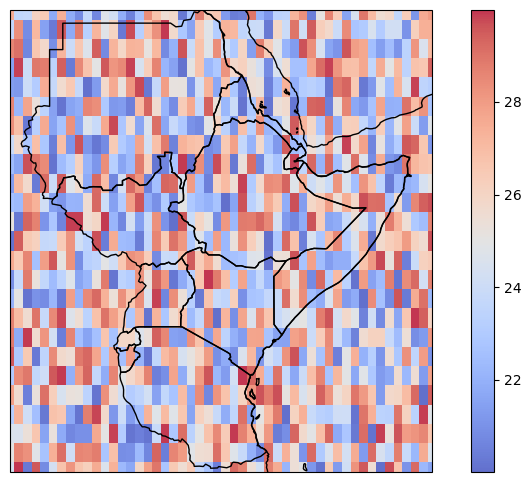

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import json
from cartopy.feature import ShapelyFeature
from shapely.geometry import shape

# Create a sample temperature dataset
def create_sample_data(lon_range, lat_range, temp_range=(20, 30)):
    lon = np.linspace(lon_range[0], lon_range[1], num=50)
    lat = np.linspace(lat_range[0], lat_range[1], num=25)
    temp = temp_range[0] + (temp_range[1] - temp_range[0]) * np.random.rand(len(lat), len(lon))
    return xr.DataArray(temp, coords=[lat, lon], dims=["lat", "lon"])

# Read GeoJSON file for boundaries
def read_geojson(filename):
    with open(filename, 'r') as f:
        return json.load(f)

# Plotting function
def plot_data_with_boundary(data, geojson_data, extent):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Plot the data
    data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', alpha=0.8)

    # Extract boundary from GeoJSON
    features = [shape(feature["geometry"]) for feature in geojson_data["features"]]
    feature = ShapelyFeature(features, ccrs.PlateCarree(), edgecolor='black', facecolor='none')
    ax.add_feature(feature, linewidth=1)

    # Set map extent
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    ax.coastlines()
    plt.show()

# Sample data for East Africa
lon_range = (21, 53)
lat_range = (-12, 23)
temperature_data = create_sample_data(lon_range, lat_range)

# GeoJSON data for the boundary
geojson_file = 'ea_ghcf_simple.json'
geojson_data = read_geojson(geojson_file)

# Plot with custom boundary
plot_data_with_boundary(temperature_data, geojson_data, extent=[lon_range[0], lon_range[1], lat_range[0], lat_range[1]])
